In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\merged_data.csv")

X = merged_data[
    [
        "Wealth",
        # "Opportunities",
        "Career Years",
        "Sex",
        "Job",
        "Dieseases",
        "Has Car",
        "Has House",
        # "Job Loss Probability",
        # "Reproduction Chance",
        "Child Possibility",
        "actual_children",
        "Personal Luxuries",
        "Healthcare Cost",
    ]
]
y = merged_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

Group
1    38154
0    22073
Name: count, dtype: int64

In [2]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM.pkl")
y_pred = model.predict(X_test)

children = X_test["actual_children"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=children
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

Overall Metric Frame:  0.7148707731473795

Metric Frame by group:  actual_children
0    0.690411
1    0.710526
2    0.714770
3    0.792593
4    0.796713
5    0.865546
6    0.902893
7    0.891026
Name: accuracy_score, dtype: float64


The Overall Metric Frame value of 0.7148 represents the specified overall performance metric (accuracy) across all groups combined. This suggests that the model’s accuracy is about 71.5% when evaluated on the entire dataset, without differentiating between groups based on the actual_children feature.

array([[<Axes: title={'center': 'accuracy'}, xlabel='actual_children'>,
        <Axes: title={'center': 'precision'}, xlabel='actual_children'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='actual_children'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='actual_children'>,
        <Axes: title={'center': 'selection rate'}, xlabel='actual_children'>,
        <Axes: title={'center': 'count'}, xlabel='actual_children'>],
       [<Axes: xlabel='actual_children'>,
        <Axes: xlabel='actual_children'>,
        <Axes: xlabel='actual_children'>]], dtype=object)

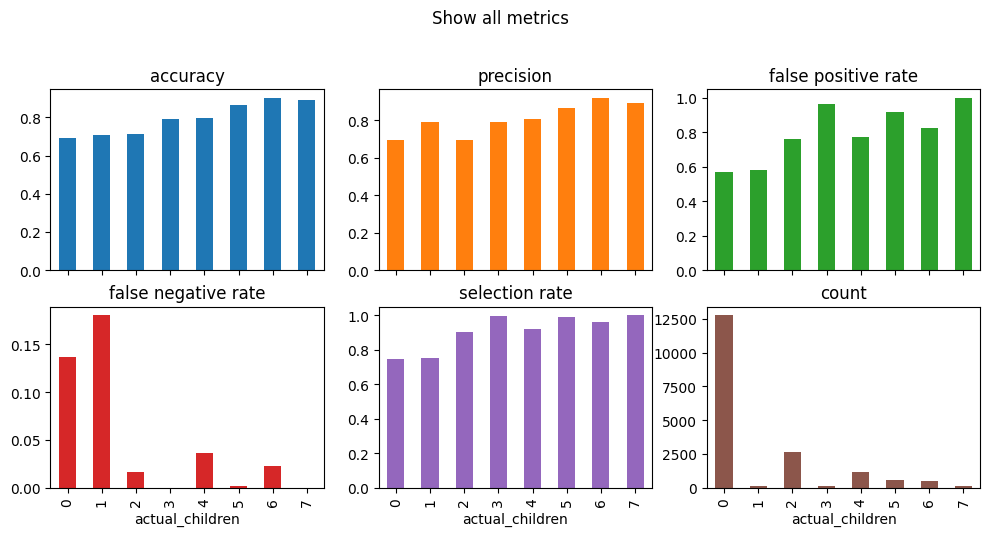

In [3]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=children
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [4]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
children = X_train["actual_children"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=children)

y_pred_mitigated = mitigator.predict(X_test)

children = X_test["actual_children"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=children)

sr_mitigated.overall

0.7057944545907355

In [5]:
print("\nMetric Frame by group: ", sr_mitigated.by_group)


Metric Frame by group:  actual_children
0    0.704579
1    0.640351
2    0.690656
3    0.740741
4    0.737889
5    0.744538
6    0.704545
7    0.698718
Name: selection_rate, dtype: float64
